In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import re
colors = ["salmon", "orange"]

# 1. Are Sharks Culés or Merengues?

In [2]:
def supporters(x):
    
    # Using MS Excel, we are able to import the table of the LaLiga winners, in order to have the necessary data.
    
    champions = pd.read_csv("ChampionsLeague.csv", encoding="latin1")
    laliga = pd.read_csv("LaLiga.csv", encoding="latin1")


    # Clean the data for the attacks database using regex, to keep only the 4-digit combination of every row.
    # Keep only the "Year" column which will be the one used in this first exercise.
    # Drop the NaN values to clean our database.
    
    x['Year'] = x['Date'].str.extract(r'(\d{4})')
    x = x[["Year"]]
    x.dropna()


    # Sort the data and create a new column to count the number of attacks per year.
    # Rename the columns for its easier use. Change also the type of the column year, which we want as int and not str.
    
    x = x['Year'].value_counts().reset_index()
    x.columns = ['Year', 'Average Attacks']
    x = x.astype({'Year':'int64'})

    
    # There were values as "Barcelona" and "FC Barcelona" in the LaLigs database.
    # They had to be modified as they both mean the same.
    
    laliga['Winner'] = laliga['Winner'].replace('Barcelona', 'FC Barcelona')

    
    # Merge the shark attack count per year and the table with each year's LaLiga winner.
    # Groupby each LaLiga winner and the average attacks on the year that each team has won.
    
    laligamerge = laliga.merge(x)
    laligamerge = laligamerge[["Winner", "Average Attacks"]]
    laligamerge = laligamerge.groupby("Winner", as_index=False).mean().round(0)

    
    # Keep only rows with "FC Barcelona" and "Real Madrid" as other teams are of no use in this case.
    
    winners = ['FC Barcelona', 'Real Madrid']
    laligamerge = laligamerge[laligamerge['Winner'].isin(winners)]


    # Once we have all the data sorted, we can plot the graph.
    # Use salmon and orange colours as the main palette for this project.

    laligamerge.plot(x='Winner', y='Average Attacks', kind='bar', title="Shark attacks when Barcelona and Real Madrid win LaLiga", xlabel="Teams", ylabel="Average Attacks", rot=0, color=colors)

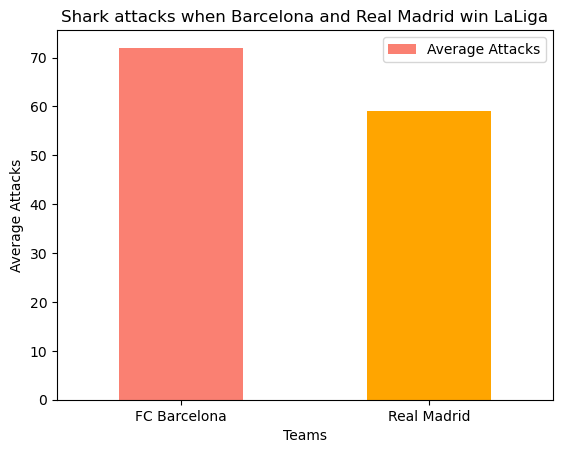

In [3]:
x = pd.read_csv("./data/attacks.csv", encoding="latin1")
supporters(x)

In [4]:
"""
CONCLUSION

We can see that clearly, sharks are culés. We see this through the increase in their excitement everytime that FC Barcelona
wins the LaLiga cup. This increase in excitement makes the sharks be more nervous and therefore we see that there are,
in average, more attacks everytime that Barça wins the Spanish League. Therefore sharks are undoubtly, culés.

""";

# 2. Why Should Joe Biden Do Something.

In [5]:
def taxes(w):
    
    # In this exercise, the following values will be assumed for the United States, as extracted from the internet:
    
    # Average income: 59,428$
    # Income tax: 22%
    # Life expectancy: 77

    
    # Only columns "Country", "Age" and "Fatal (Y/N)" will be used in this exercise.
    
    w = pd.read_csv("./data/attacks.csv", encoding="latin1")
    w = w[["Country", "Age", "Fatal (Y/N)"]]

    
    # Code the values in the column "Fatal (Y/N)" for it to be 1, if "Y" and 0, if "N".
    
    responses = ["Y", "N"]
    w = w[w['Fatal (Y/N)'].isin(responses)]
    w["Fatal (Y/N)"] = w["Fatal (Y/N)"].replace("Y", 1)
    w["Fatal (Y/N)"] = w["Fatal (Y/N)"].replace("N", 0)

    
    # Carry out the necessary cleaning in the "Age" column, as well as changing its type to int, and droping NaN values.
    
    w["Age"] = w["Age"].str.extract("([0-9]+)")
    w = w.dropna()
    w = w.astype({"Age":"int64"})

    
    # Taking 77 as the life expectancy, calculate the expected years of life left of each individual.
    
    w["Age"] = 77 - w["Age"]

    
    # The country used in this exercise will be the United States, therefore the necessary filtering has to be done.
    
    usa = ["USA"]
    w = w[w['Country'].isin(usa)]

    
    # Taking into account the previously mentioned variables, the corresponding calculation has to be done to get the total
    # amount of taxes that the shark attacks have cost the United States.
    
    wcountry = w["Country"].count()
    fatality = w["Fatal (Y/N)"].value_counts()[1]
    wage = w["Age"].mean()
    value = int(((fatality * wage * 59428) * 0.22))

    
    # Print the outcome.
    
    print(f"In the United States alone, a total of {value:,}$ in taxes have been lost due to shark attacks.")

In [6]:
w = pd.read_csv("./data/attacks.csv", encoding="latin1")
taxes(w)

In the United States alone, a total of 52,706,603$ in taxes have been lost due to shark attacks.


In [7]:
"""
CONCLUSION

We have seen through this exercise how shark attacks have had a massive impact in the US economy. A total amount of 
52,726,701$ in taxes have been lost due to shark attacks. Although this is an issue that has been occurring since long ago,
Joe Biden should be the one to start looking for a solution.

""";

# 3. How Minecraft has saved uncountable lifes

In [8]:
def minecraft(a):
    
    # Only the "Year" and "Fatal (Y/N)" columns were needed for this exercise.
    
    z = a
    z = z[["Year", "Fatal (Y/N)"]]
    z = z.dropna()

    
    # Only "Y" and "N" values will be needed and the corresponding filtering has to be done.
    # Also to mention that only data after the year 2000 will be used for the purpose of this exercise.
    
    responses = ["Y", "N"]
    z = z[z['Fatal (Y/N)'].isin(responses)]
    z = z[z["Year"] > 2000]

    
    # Code the values in the column "Fatal (Y/N)" for it to be 1, if "Y" and 0, if "N".
    
    z['Fatal (Y/N)'] = z['Fatal (Y/N)'].replace('Y', 1)
    z['Fatal (Y/N)'] = z['Fatal (Y/N)'].replace('N', 0)

    
    # Minecraft was released in 2011, and therefore a split between a before and an after such date is done here.
    # Groupby of such splits have also been done to count the number of attacks per year.
    # Finally a mean is done to calculate the falality percentages out of all the attacks.
    
    zbefore = z[z["Year"] < 2011]
    zafter = z[z["Year"] >= 2011]
    zbefore = zbefore.groupby(["Year"]).mean()
    zafter = zafter.groupby(["Year"]).mean()
    zbefore["Fatal (Y/N)"].mean()
    zafter["Fatal (Y/N)"].mean()

    
    # A new dataframe is created to join the groupbys of the split done earlier.
    # The bar chart is plotted using this new dataframe.
    
    df = pd.DataFrame({'Timeframe': ['After 2011', 'Before 2011'], 'Fatality Rate': [zafter["Fatal (Y/N)"].mean(), zbefore["Fatal (Y/N)"].mean()]})
    ax = df.plot.barh(x='Timeframe', y='Fatality Rate', color=colors)

    
    # Carry out the corresponding cleaning for the second graph.
    
    z1 = a
    z1 = z1[["Year", "Fatal (Y/N)"]]
    z1 = z1.dropna()
    l = z1.dropna()

    
    # Filter the values in the "Fatal (Y/N)" to only leave "Y" and "N".
    # There will be two different groups, one with both "Y" and "N", and another with only "N". This is done to be able to
    # calculate the percentages of attacks that became fatal, compared to the ones where they didn't.
    
    responses = ["Y"]
    responses2 = ["Y", "N"]
    z1 = z1[z1['Fatal (Y/N)'].isin(responses)]
    l = l[l['Fatal (Y/N)'].isin(responses2)]
    z1 = z1[z1["Year"] > 2000]
    l = l[l["Year"] > 2000]
    z1 = z1.groupby(["Year"]).count() / l.groupby(["Year"]).count()
    z1.columns = ["Average"]
    z1['Year'] = z1.index
    
    
    # Plot the line graph, including a vertical line showing when the game was released.

    ax = z1.plot(x='Year', y='Average', kind='line', title="Fatality rate after Minecraft's release", xlabel="Teams", ylabel="Average Attacks", rot=0, color=colors);
    ax.axvline(2011, color="orange", linestyle="dashed");

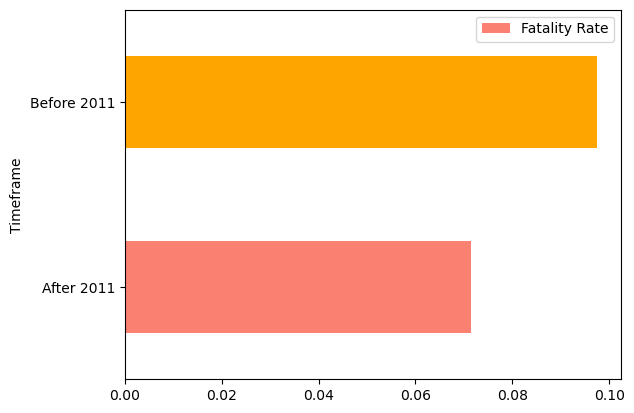

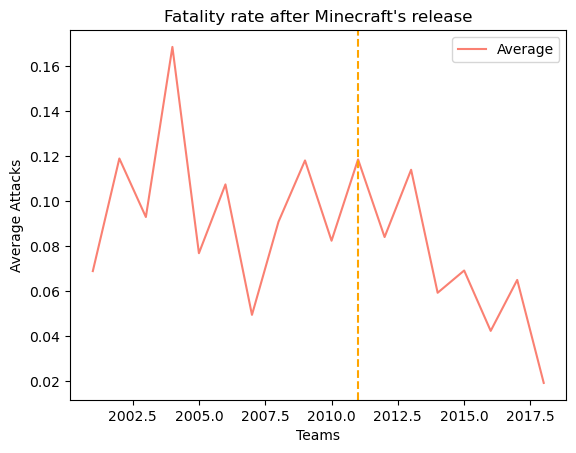

In [9]:
z = pd.read_csv("./data/attacks.csv", encoding="latin1")
minecraft(z)

In [10]:
"""
CONCLUSION

Minecraft was released in 2011. Looking at the data, we can see how the average fatalities from shark attacks have 
seen an enormous decrease since Mineacraft was released. We also know that Minecraft's survival mode shines for its
ability to put players under pressure when looking for ways to survive from many different attacks.

Therefore, it is safe to say that Minecraft has had a positive impact on our self-defense skills against many
different dangerous situations, and in this case, shark attacks.

Minecraft has therefore, improved our ability yo stay alive against risky situations.
""";

# 4. Do Sharks Hate English-speakers?

In [11]:
def english(y):
    
    # Start by cleaning the data from attacks looking for the country where the attacks happened.
    # Drop also NaN values.

    y = pd.read_csv("./data/attacks.csv", encoding="latin1")
    y = y[["Country"]]
    y = y.dropna()
    
    
    # Create a new column that counts the number of attacks per country.
    # Rename the columns.
    # Only the five countries with more attacks will be used for this exercise.
    
    y = y['Country'].value_counts().reset_index()
    y.columns = ["Country", "Count"]
    y = y.nlargest(5, 'Count')
    
    
    # The five countries with most attacks were: United States, Australia, South Africa, Papua New Guinea and New Zealand.
    # The following information was extracted from the internet and representa the approximate percentage of each
    # country's population that speak english:
    
    # United States: 99%
    # Australia: 94%
    # South Africa: 76%
    # Papua New Guinea: 77%
    # New Zealand: 95%

    s = pd.Series([0.99, 0.94, 0.76, 0.77, 0.95], index=[0, 1, 2, 3, 4])
    y['Estimated English Speaking (%)'] = s.values
    
    
    # Create a new dataframe with the above mentioned data.
    
    y1 = pd.DataFrame({"English": [y['Estimated English Speaking (%)'].mean(), 1 - y['Estimated English Speaking (%)'].mean()]},
                      index=['English', "Non-English"])
    

    # Print the pie chart using the new dataframe.
    
    plot = y1.plot.pie(y='English', figsize=(5, 5), colors=colors, autopct='%1.1f%%')

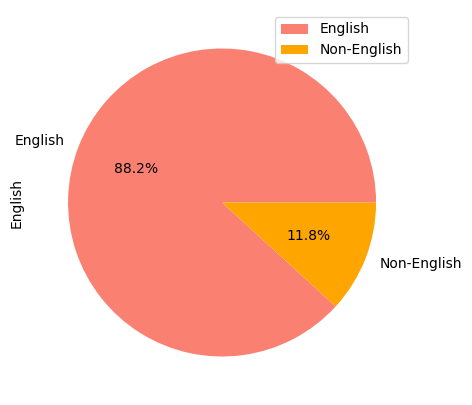

In [12]:
y = pd.read_csv("./data/attacks.csv", encoding="latin1")
english(y)

In [13]:
 """
CONCLUSION

Through a search through the internet to find the english-speaking percentages of the five-most attacked countries by sharks,
we have seen how these are countries with extremely high english-speaking populations. Therefore, it is easy to say that:
sharks hate english-speakers, and consequently, you have a higher risk of being attacked if you speak the language.

""";